In [5]:
import pandas as pd
import numpy as np
from deep_translator import GoogleTranslator
import matplotlib.pyplot as plt; plt.rcdefaults()

In [9]:
df = pd.read_csv("amazon.csv", encoding = "ISO-8859-1", thousands = ".")

In [15]:
print(df)

      year      state     month  number        date
0     1998       Acre   Janeiro       0  1998-01-01
1     1999       Acre   Janeiro       0  1999-01-01
2     2000       Acre   Janeiro       0  2000-01-01
3     2001       Acre   Janeiro       0  2001-01-01
4     2002       Acre   Janeiro       0  2002-01-01
...    ...        ...       ...     ...         ...
6449  2012  Tocantins  Dezembro     128  2012-01-01
6450  2013  Tocantins  Dezembro      85  2013-01-01
6451  2014  Tocantins  Dezembro     223  2014-01-01
6452  2015  Tocantins  Dezembro     373  2015-01-01
6453  2016  Tocantins  Dezembro     119  2016-01-01

[6454 rows x 5 columns]


In [17]:
df.head

<bound method NDFrame.head of       year      state     month  number        date
0     1998       Acre   Janeiro       0  1998-01-01
1     1999       Acre   Janeiro       0  1999-01-01
2     2000       Acre   Janeiro       0  2000-01-01
3     2001       Acre   Janeiro       0  2001-01-01
4     2002       Acre   Janeiro       0  2002-01-01
...    ...        ...       ...     ...         ...
6449  2012  Tocantins  Dezembro     128  2012-01-01
6450  2013  Tocantins  Dezembro      85  2013-01-01
6451  2014  Tocantins  Dezembro     223  2014-01-01
6452  2015  Tocantins  Dezembro     373  2015-01-01
6453  2016  Tocantins  Dezembro     119  2016-01-01

[6454 rows x 5 columns]>

In [19]:
df.tail

<bound method NDFrame.tail of       year      state     month  number        date
0     1998       Acre   Janeiro       0  1998-01-01
1     1999       Acre   Janeiro       0  1999-01-01
2     2000       Acre   Janeiro       0  2000-01-01
3     2001       Acre   Janeiro       0  2001-01-01
4     2002       Acre   Janeiro       0  2002-01-01
...    ...        ...       ...     ...         ...
6449  2012  Tocantins  Dezembro     128  2012-01-01
6450  2013  Tocantins  Dezembro      85  2013-01-01
6451  2014  Tocantins  Dezembro     223  2014-01-01
6452  2015  Tocantins  Dezembro     373  2015-01-01
6453  2016  Tocantins  Dezembro     119  2016-01-01

[6454 rows x 5 columns]>

In [21]:
df.shape

(6454, 5)

In [23]:
df.describe

<bound method NDFrame.describe of       year      state     month  number        date
0     1998       Acre   Janeiro       0  1998-01-01
1     1999       Acre   Janeiro       0  1999-01-01
2     2000       Acre   Janeiro       0  2000-01-01
3     2001       Acre   Janeiro       0  2001-01-01
4     2002       Acre   Janeiro       0  2002-01-01
...    ...        ...       ...     ...         ...
6449  2012  Tocantins  Dezembro     128  2012-01-01
6450  2013  Tocantins  Dezembro      85  2013-01-01
6451  2014  Tocantins  Dezembro     223  2014-01-01
6452  2015  Tocantins  Dezembro     373  2015-01-01
6453  2016  Tocantins  Dezembro     119  2016-01-01

[6454 rows x 5 columns]>

In [25]:
df.describe(include="all")

,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,20
top,NaN,Rio,Janeiro,NaN,1998-01-01
freq,NaN,717,541,NaN,324
mean,2007.461729,NaN,NaN,522.696312,NaN
std,5.746654,NaN,NaN,1554.846486,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2002.000000,NaN,NaN,9.000000,NaN
50%,2007.000000,NaN,NaN,54.000000,NaN
75%,2012.000000,NaN,NaN,269.000000,NaN


In [27]:
df.isna()

,year,state,month,number,date
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
6449,False,False,False,False,False
6450,False,False,False,False,False
6451,False,False,False,False,False
6452,False,False,False,False,False


In [29]:
df.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [31]:
df = df.replace(0, np.nan)

In [37]:
df2 = df.dropna(subset = ['number'])

In [39]:
df2.describe(include="all")

,year,state,month,number,date
count,5837.000000,5837,5837,5837.000000,5837
unique,NaN,23,12,NaN,20
top,NaN,Rio,Outubro,NaN,2016-01-01
freq,NaN,661,534,NaN,317
mean,2007.834847,NaN,NaN,577.947918,NaN
std,5.649076,NaN,NaN,1625.176973,NaN
min,1998.000000,NaN,NaN,1.000000,NaN
25%,2003.000000,NaN,NaN,16.000000,NaN
50%,2008.000000,NaN,NaN,72.000000,NaN
75%,2013.000000,NaN,NaN,334.000000,NaN


In [41]:
forest_fire_per_month = df2.groupby('month')['number'].sum()

In [43]:
forest_fire_per_month

month
Abril          28364.0
Agosto        740841.0
Dezembro      152596.0
Fevereiro      30952.0
Janeiro        52587.0
Julho         217620.0
Junho         111405.0
Maio           46083.0
Março          35118.0
Novembro      312326.0
Outubro       629665.0
Setembro     1015925.0
Name: number, dtype: float64

In [45]:
month_unique = list(df.month.unique())

In [47]:
month_unique

['Janeiro',
 'Fevereiro',
 'Março',
 'Abril',
 'Maio',
 'Junho',
 'Julho',
 'Agosto',
 'Setembro',
 'Outubro',
 'Novembro',
 'Dezembro']

In [51]:
forest_fire_per_month = forest_fire_per_month.reindex(month_unique, axis=0)

In [54]:
forest_fire_per_month

month
Janeiro        52587.0
Fevereiro      30952.0
Março          35118.0
Abril          28364.0
Maio           46083.0
Junho         111405.0
Julho         217620.0
Agosto        740841.0
Setembro     1015925.0
Outubro       629665.0
Novembro      312326.0
Dezembro      152596.0
Name: number, dtype: float64

In [56]:
forest_fire_per_month = forest_fire_per_month.to_frame()

In [58]:
forest_fire_per_month

,number
month,
Janeiro,52587.0
Fevereiro,30952.0
Março,35118.0
Abril,28364.0
Maio,46083.0
Junho,111405.0
Julho,217620.0
Agosto,740841.0
Setembro,1015925.0


In [60]:
forest_fire_per_month.reset_index(level = 0, inplace = True)

In [62]:
forest_fire_per_month

,month,number
0,Janeiro,52587.0
1,Fevereiro,30952.0
2,Março,35118.0
3,Abril,28364.0
4,Maio,46083.0
5,Junho,111405.0
6,Julho,217620.0
7,Agosto,740841.0
8,Setembro,1015925.0
9,Outubro,629665.0


In [66]:
for month in month_unique:
    translated = GoogleTranslator(source = "auto", target="en").translate(month)
    print(translated)
    print("....")

January
....
February
....
March
....
April
....
May
....
June
....
July
....
August
....
September
....
October
....
November
....
December
....


In [74]:
for i,m in enumerate(forest_fire_per_month["month"]):
    translated = GoogleTranslator(source = "auto", target = "en").translate(m)
    month1 = translated
    forest_fire_per_month.at[i, 'month'] = month1
print(forest_fire_per_month)

        month     number
0     January    52587.0
1    February    30952.0
2       March    35118.0
3       April    28364.0
4         May    46083.0
5        June   111405.0
6        July   217620.0
7      August   740841.0
8   September  1015925.0
9     October   629665.0
10   November   312326.0
11   December   152596.0


Text(0, 0.5, 'Number of Forest Fires')

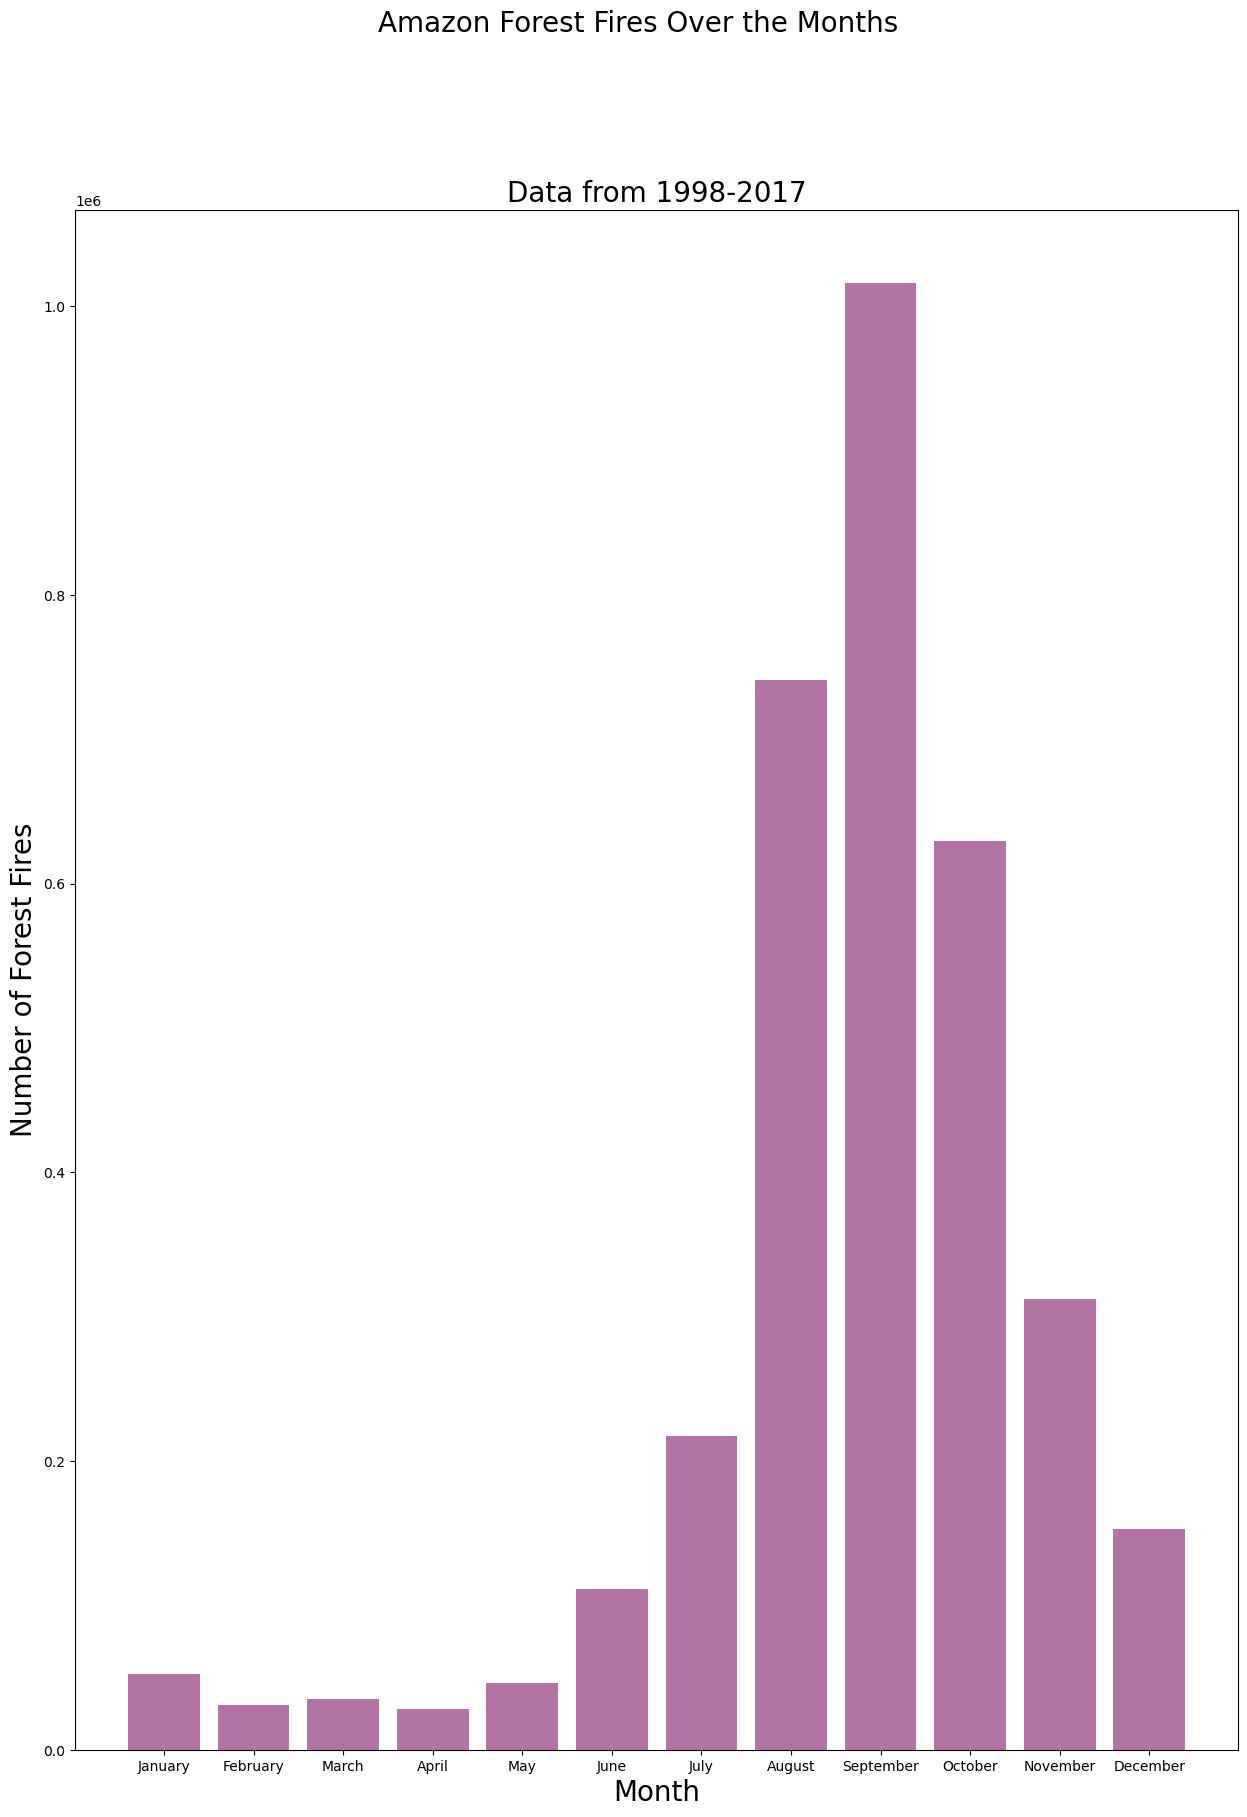

In [82]:
plt.figure(figsize=(15, 20)) 
plt.bar(
    forest_fire_per_month['month'],
    forest_fire_per_month['number'],
    color = (0.5, 0.1, 0.4, 0.6)
)
plt.suptitle('Amazon Forest Fires Over the Months', fontsize = 20)
plt.title("Data from 1998-2017", fontsize = 20)
plt.xlabel('Month', fontsize = 20)
plt.ylabel("Number of Forest Fires", fontsize = 20)

(0.0, 1215925.0)

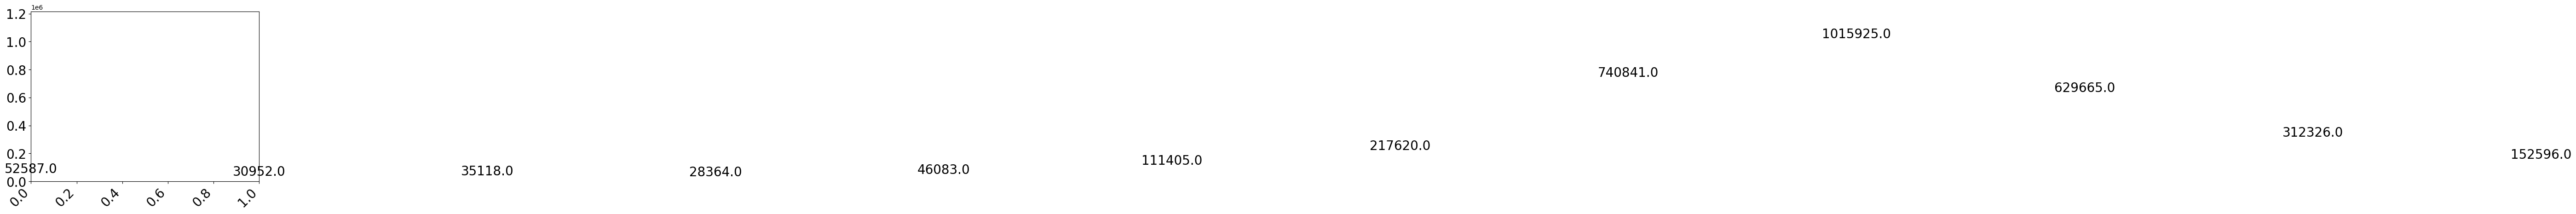

In [106]:
for i, num in enumerate(forest_fire_per_month['number']):
    plt.text(
        i,
        num + 10000,
        str(num),
        ha = 'center',
        fontsize=20
    )

plt.setp(plt.gca().get_xticklabels(),
         rotation=45,
         ha="right",
         fontsize=20)

plt.setp(plt.gca().get_yticklabels(),
         fontsize=20)


plt.ylim(0, forest_fire_per_month['number'].max() + 200000)